In [263]:
# Data Manipulation
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Visualization (Static)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization (Interactive)
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Import Data 

In [264]:
# 1) All variables and countries from the master data
final_df_long= pd.read_csv("https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/master_data_long.csv")
final_df_long = final_df_long.drop(columns=['Unnamed: 0'], errors='ignore')

# 2) Clusters list from Leo
clusters_list = pd.read_csv('https://raw.githubusercontent.com/AyaanTigdikar/Capstone/refs/heads/main/workingdata/clusters_list.csv')

# Cluster variations across time 

### Pre-processing 

In [ ]:
final_df_long[final_df_long['Variable'] == 'Economic Complexity Index'].isna().sum()
final_df_long

Country Code     0
Year             0
Variable         0
Value            0
Country Name    25
dtype: int64

In [ ]:
windows = {
    3: ([1995, 1996, 1997], [2017, 2018, 2019]),
    5: ([1995, 1996, 1997, 1998, 1999], [2015, 2016, 2017, 2018, 2019]),
    7: ([1995, 1996, 1997, 1998, 1999, 2000, 2001], [2013, 2014, 2015, 2016, 2017, 2018, 2019])
}

results = {}

for k, (start_years, end_years) in windows.items():

    df_k = final_df_long[
        final_df_long['Year'].isin(start_years + end_years)
    ].copy()

    pivot = df_k.pivot_table(
        index=['Country Code', 'Variable'],
        columns='Year',
        values='Value'
    )

    pivot[f'avg_{start_years[0]}_{start_years[-1]}'] = pivot[start_years].mean(axis=1)
    pivot[f'avg_{end_years[0]}_{end_years[-1]}']     = pivot[end_years].mean(axis=1)

    df_change = (
        pivot[f'avg_{end_years[0]}_{end_years[-1]}'] - pivot[f'avg_{start_years[0]}_{start_years[-1]}']
    ).reset_index(name='Net_Change')

    df_change_wide = df_change.pivot(
        index='Country Code',
        columns='Variable',
        values='Net_Change'
    )

    results[k] = df_change_wide.merge(
        clusters_list,
        how='right',
        on='Country Code'
    )

df_3_change_clusters = results[3]
df_5_change_clusters = results[5]
df_7_change_clusters = results[7]

In [ ]:
df_3_change_clusters

,Country Code,Accountability index,Adjusted savings: gross savings (% of GNI),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: total (current US$),Agriculture,CPIA building human resources rating (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),"CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)",Capital depreciation rate,...,Total natural resources rents (% of GDP),"Use of IMF credit (DOD, current US$)",Welfare-relevant TFP,deliberative_dem,egalitarian_dem,electoral_dem,liberal_dem,participatory_dem,Country Name,cluster_6
0,AFG,1.228000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.213000,0.116333,0.243333,0.145667,0.107333,Afghanistan,0
1,DZA,-0.109667,5.523325,0.395408,2.655957e+10,NaN,NaN,NaN,NaN,0.008440,...,2.056406,9.228342e+08,NaN,-0.053333,0.024667,0.062667,0.047667,0.005667,Algeria,2
2,ARG,-0.118000,-1.628856,0.484825,3.896770e+09,-0.918683,NaN,NaN,NaN,0.009406,...,0.639994,2.413571e+10,0.207586,-0.171333,-0.046333,-0.055000,-0.009000,-0.050000,Argentina,0
3,ARM,0.313667,19.212740,NaN,NaN,NaN,NaN,NaN,NaN,-0.005659,...,1.003659,NaN,NaN,0.031000,-0.044333,-0.044333,0.073333,0.105333,Armenia,0
4,AUS,-0.156000,2.118881,0.908693,6.891202e+10,-0.703518,NaN,NaN,NaN,0.006034,...,2.894485,NaN,-0.059322,-0.026667,-0.058667,-0.040000,-0.041000,-0.053000,Australia,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,VEN,-1.837667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006071,...,NaN,NaN,-0.639869,-0.596667,-0.377000,-0.522000,-0.544667,-0.318333,Venezuela,0
132,VNM,0.142333,NaN,-3.032031,NaN,-22.425533,NaN,NaN,NaN,0.018048,...,-5.666765,3.403912e+08,NaN,0.027333,-0.001000,0.022000,0.040000,0.005667,Vietnam,0
133,YEM,-0.837000,NaN,-8.202315,NaN,1.425109,NaN,NaN,NaN,-0.003667,...,-14.171913,4.725520e+08,NaN,-0.187667,-0.079667,-0.175667,-0.119333,-0.012667,Yemen,0
134,ZMB,-0.100667,NaN,-2.897587,NaN,-19.111380,NaN,NaN,NaN,0.007857,...,5.385885,-1.221881e+08,-0.048340,-0.053000,-0.025333,-0.026333,-0.019333,-0.013333,Zambia,4


In [279]:
df_5_change_clusters

,Country Code,Accountability index,Adjusted savings: gross savings (% of GNI),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: total (current US$),Agriculture,CPIA building human resources rating (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),"CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)",Capital depreciation rate,...,Welfare-relevant TFP,deliberative_dem,egalitarian_dem,electoral_dem,liberal_dem,participatory_dem,Country Name,cluster_6,label,label_services
0,AFG,1.3052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.2274,1.318000e-01,0.2470,0.1574,0.1102,Afghanistan,0,Not Successful,NaN
1,DZA,-0.0634,4.691232,-0.836730,2.650331e+10,NaN,NaN,NaN,NaN,0.008840,...,NaN,-0.0322,3.640000e-02,0.0896,0.0514,0.0166,Algeria,2,Not Successful,NaN
2,ARG,-0.1518,-1.609695,0.222437,6.571439e+09,-0.353786,NaN,NaN,NaN,0.008769,...,0.164446,-0.1800,-4.920000e-02,-0.0608,-0.0194,-0.0558,Argentina,0,Not Successful,Not Successful
3,ARM,0.0748,16.948609,0.188177,4.919790e+08,NaN,NaN,NaN,NaN,-0.004891,...,0.467682,-0.0456,-9.900000e-02,-0.1032,0.0054,0.0452,Armenia,0,Mid Successful,NaN
4,AUS,-0.1074,1.401265,0.647845,6.351324e+10,-0.728409,NaN,NaN,NaN,0.006049,...,-0.050949,-0.0182,-4.860000e-02,-0.0308,-0.0308,-0.0520,Australia,4,Not Successful,Mid Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,VEN,-1.6950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007416,...,-0.485530,-0.5966,-3.540000e-01,-0.4958,-0.5244,-0.3008,Venezuela,0,Not Successful,NaN
132,VNM,0.1272,NaN,-2.554888,NaN,-18.718827,NaN,NaN,NaN,0.019577,...,NaN,0.0244,2.775558e-17,0.0120,0.0388,0.0024,Vietnam,0,Successful,Not Successful
133,YEM,-0.7680,NaN,-14.003470,NaN,-0.636242,NaN,NaN,NaN,-0.001150,...,NaN,-0.1810,-7.540000e-02,-0.1694,-0.1060,-0.0086,Yemen,0,Mid Successful,Not Successful
134,ZMB,-0.1288,NaN,-3.667877,NaN,-14.408141,NaN,NaN,NaN,0.008955,...,0.024617,-0.0924,-3.200000e-02,-0.0390,-0.0244,-0.0218,Zambia,4,Not Successful,Successful


#### NA check

In [266]:
df_5_change_clusters.shape # 136 countries

(136, 48)

In [267]:
df_5_change_clusters.isna().sum() # Really bad. ECI is the best.

Country Code                                                                                        0
Accountability index                                                                                1
Adjusted savings: gross savings (% of GNI)                                                         37
Adjusted savings: natural resources depletion (% of GNI)                                           16
Adjusted savings: total (current US$)                                                              40
Agriculture                                                                                        11
CPIA building human resources rating (1=low to 6=high)                                            136
CPIA quality of budgetary and financial management rating (1=low to 6=high)                       136
CPIA transparency, accountability and corruption in the public sector rating (1=low to 6=high)    136
Capital depreciation rate                                                         

### ECI list (continuous labels)

In [268]:
# Create a categorical variable with 3 equally sized groups
df_5_change_clusters['label'] = pd.qcut(
    df_5_change_clusters['Economic Complexity Index'], 
    q=3,  # split into 3 quantiles
    labels=['Not Successful', 'Mid Successful', 'Successful']
)

# Create a categorical variable with 3 equally sized groups
df_5_change_clusters['label_services'] = pd.qcut(
    df_5_change_clusters['Services'], 
    q=3,  # split into 3 quantiles
    labels=['Not Successful', 'Mid Successful', 'Successful']
)

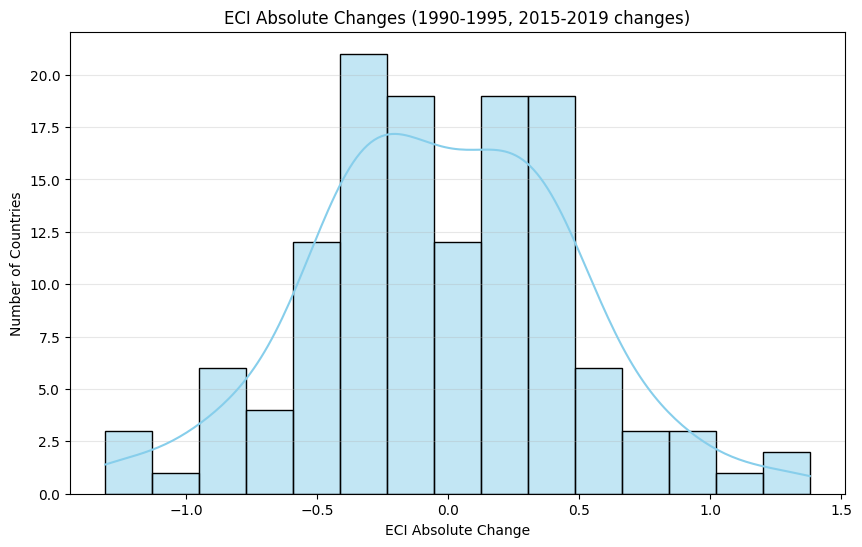

In [269]:
# --- 1. Histogram of ECI changes ---
plt.figure(figsize=(10,6))
sns.histplot(df_5_change_clusters['Economic Complexity Index'], bins=15, kde=True, color='skyblue')
plt.title('ECI Absolute Changes (1990-1995, 2015-2019 changes)')
plt.xlabel('ECI Absolute Change')
plt.ylabel('Number of Countries')
plt.grid(axis='y', alpha=0.3)
plt.show()

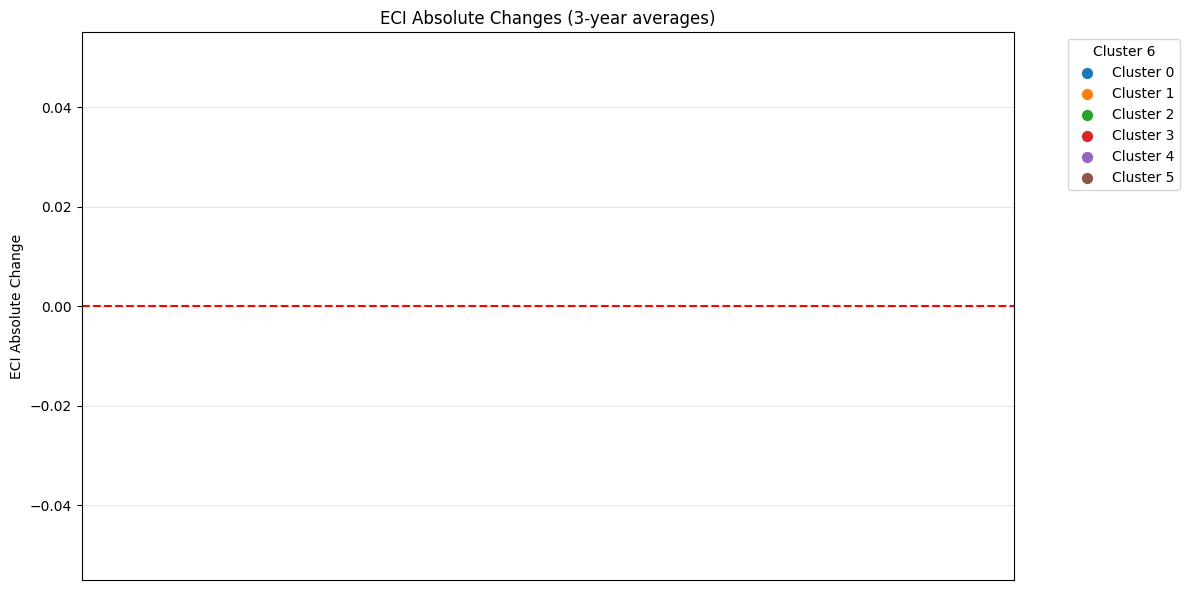

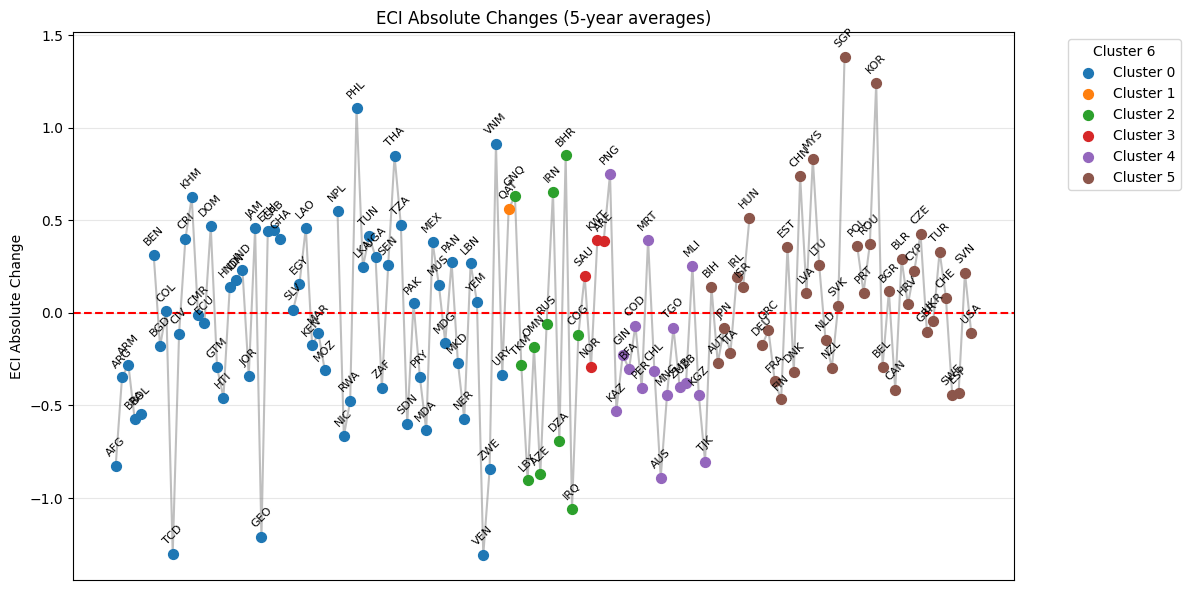

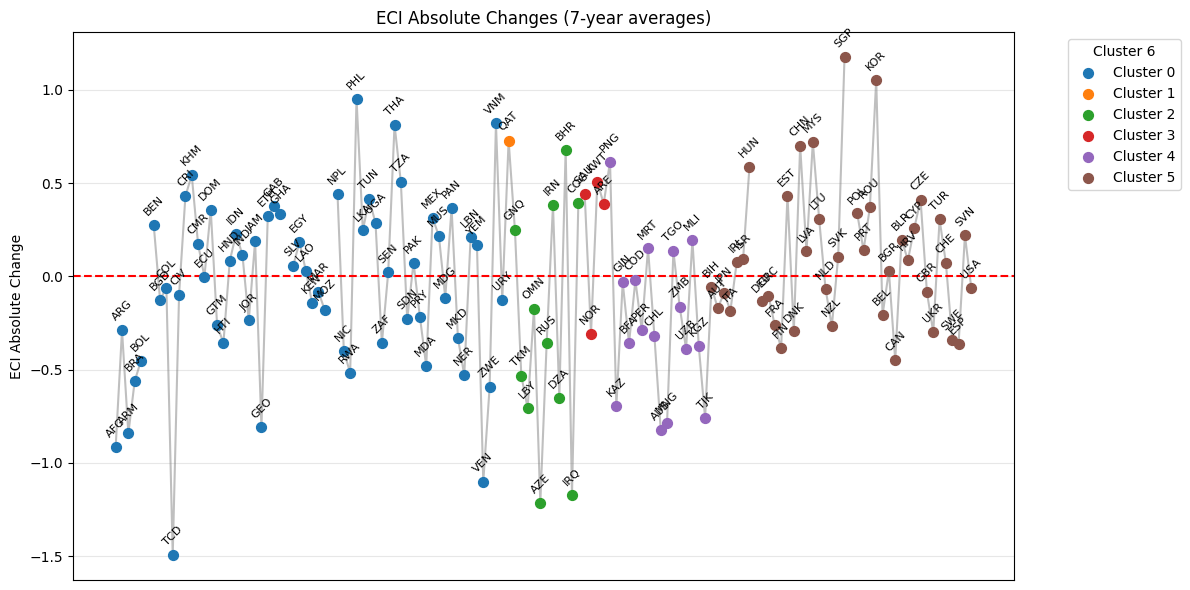

In [273]:
dfs = {
    3: df_3_change_clusters,
    5: df_5_change_clusters,
    7: df_7_change_clusters
}

for k, df in dfs.items():

    df_sorted = df.sort_values('cluster_6').reset_index(drop=True)

    plt.figure(figsize=(12,6))

    unique_clusters = df_sorted['cluster_6'].unique()
    palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
    cluster_colors = dict(zip(unique_clusters, palette))

    # Line
    plt.plot(df_sorted.index, df_sorted['Economic Complexity Index'],
             linestyle='-', color='gray', alpha=0.5)

    # Points + labels
    for cluster in unique_clusters:
        cluster_data = df_sorted[df_sorted['cluster_6'] == cluster]
        plt.scatter(cluster_data.index,
                    cluster_data['Economic Complexity Index'],
                    color=cluster_colors[cluster],
                    s=50,
                    label=f'Cluster {cluster}',
                    zorder=3)

        for i, row in cluster_data.iterrows():
            plt.text(i,
                     row['Economic Complexity Index'] + 0.04,
                     row['Country Code'],
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     rotation=45)

    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.xticks([])
    plt.title(f'ECI Absolute Changes ({k}-year averages)')
    plt.ylabel('ECI Absolute Change')
    plt.grid(alpha=0.3)
    plt.legend(title='Cluster 6', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


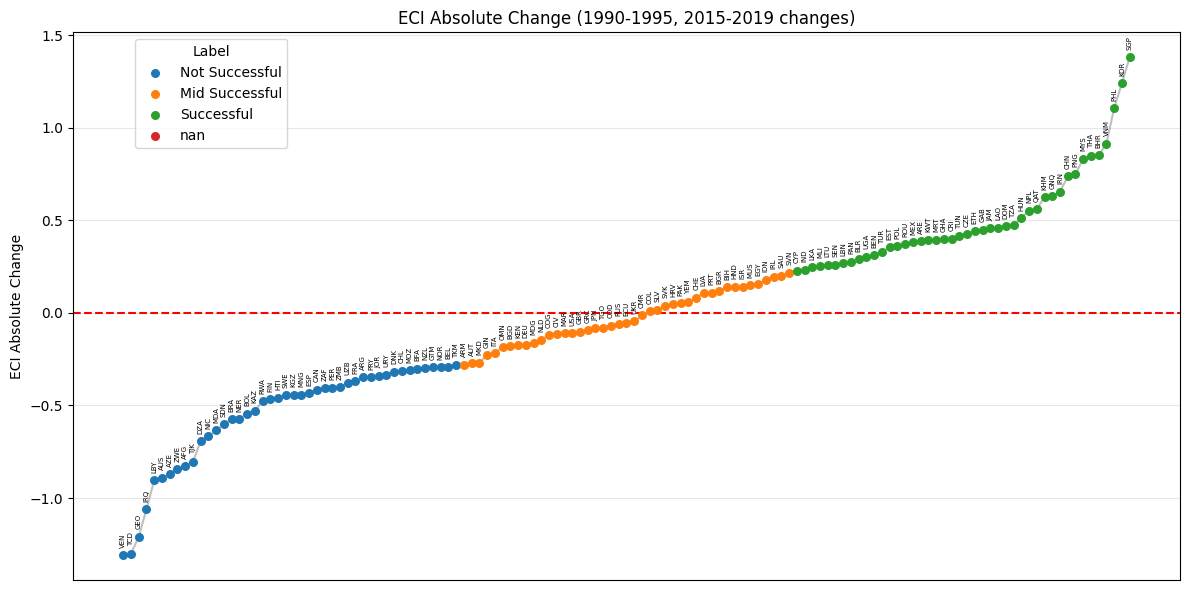

In [272]:
# Sort by ECI change
df_sorted = df_5_change_clusters.sort_values('Economic Complexity Index').reset_index(drop=True)

plt.figure(figsize=(12,6))

# Generate a color palette based on unique clusters
unique_clusters = df_sorted['label'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, palette)}

# Plot line connecting points (gray)
plt.plot(df_sorted.index, df_sorted['Economic Complexity Index'], linestyle='-', color='gray', alpha=0.5)

# Plot points colored by cluster and keep references for legend
scatter_handles = []
for cluster in unique_clusters:
    cluster_data = df_sorted[df_sorted['label'] == cluster]
    sc = plt.scatter(cluster_data.index, cluster_data['Economic Complexity Index'],
                     color=cluster_colors[cluster], s=30, label=f'{cluster}', zorder=3)
    scatter_handles.append(sc)
    # Annotate each point with country code
    for i, row in cluster_data.iterrows():
        plt.text(i, row['Economic Complexity Index'] + 0.04, row['Country Code'], 
                 ha='center', va='bottom', fontsize=5, rotation=90)


# Remove x-axis labels
plt.xticks([])
# Add red dashed horizontal line at 0
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1.5)
plt.title('ECI Absolute Change (1990-1995, 2015-2019 changes)')
plt.xlabel('')
plt.ylabel('ECI Absolute Change')
plt.grid(alpha=0.3)
plt.legend(title='Label', bbox_to_anchor=(.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## LASSO

## Random Forest

## Export matrix sophistication

In [184]:
products = pd.read_csv(r"C:\Users\iorueta\PC IGNACIO\0.LSE\MPA DSPP\3. Autumm Term 2025\Capstone Moody's\Capstone\rawdata\hs92_country_product_year_2.csv")

# Inspect
products.head()

,country_id,country_iso3_code,product_id,product_hs92_code,year,export_value,import_value,global_market_share,distance,cog,pci
0,4,AFG,100,1,1995,14517,0,0.000001,0.943,0.001,-0.565
1,4,AFG,100,1,1996,17207,0,0.000002,0.951,0.001,-0.631
2,4,AFG,100,1,1997,22781,0,0.000003,0.938,0.001,-0.519
3,4,AFG,100,1,2000,0,7786,0.000000,0.931,0.001,-0.605
4,4,AFG,100,1,2001,0,15592,0.000000,0.930,0.001,-0.825


In [186]:
YEAR = 2015   # choose a year
products_2015 = products[products['year'] == YEAR].copy()

In [189]:
# Total exports by country
country_totals = products_2015.groupby('country_iso3_code')['export_value'].sum()

# Total exports by product
product_totals = products_2015.groupby('product_id')['export_value'].sum()

# World total exports
world_total = products_2015['export_value'].sum()

# Merge totals
products_2015 = products_2015.merge(country_totals, on='country_iso3_code', suffixes=('', '_country'))
products_2015 = products_2015.merge(product_totals, on='product_id', suffixes=('', '_product'))

# RCA
products_2015['RCA'] = (
    (products_2015['export_value'] / products_2015['export_value_country']) /
    (products_2015['export_value_product'] / world_total)
)


products_2015['M'] = (products_2015['RCA'] >= 1).astype(int)

M = products_2015.pivot_table(
    index='country_iso3_code',
    columns='product_id',
    values='M',
    fill_value=0
)

In [190]:
M

product_id,100,101,102,103,104,105,106,107,108,109,...,187,188,189,190,191,192,193,194,195,196
country_iso3_code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFG,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIA,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
ALB,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
YEM,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
